# Algerian Forest Fire Dataset - Temperature Prediction

In [14]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [15]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Reading and Cleaning

In [17]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.info

<bound method DataFrame.info of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fir

In [6]:
df.head(246)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

Drop an row

In [9]:
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [10]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [ ]:
##Stripping the names of the columns

In [11]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [1]:
##Dropping the Classes Features

In [13]:
df.drop('Classes',axis=1,inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia


In [2]:
#Replacing the day,month,year feature with date feature

In [14]:
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)

In [15]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,Sidi-Bel Abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,Sidi-Bel Abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Sidi-Bel Abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Sidi-Bel Abbes,2012-09-29


In [3]:
##Checking the datatypes of features

In [16]:
df.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
region                 object
date           datetime64[ns]
dtype: object

In [4]:
#Changing the datatypes of features

In [18]:
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

In [19]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,Sidi-Bel Abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,Sidi-Bel Abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Sidi-Bel Abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Sidi-Bel Abbes,2012-09-29


In [5]:
#Applying Label encoding in DC,FWI,region features

In [20]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [21]:
df['DC']=LabelEncoder.fit_transform(df['DC'])
df['FWI']=LabelEncoder.fit_transform(df['FWI'])
df['region']=LabelEncoder.fit_transform(df['region'])

In [22]:

df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int32
ISI                   float64
BUI                   float64
FWI                     int32
region                  int32
date           datetime64[ns]
dtype: object

In [6]:
#Checking the null values


In [23]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
date           0
dtype: int64

In [7]:
#Univariate Analysis

In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [25]:
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region',
 'date']

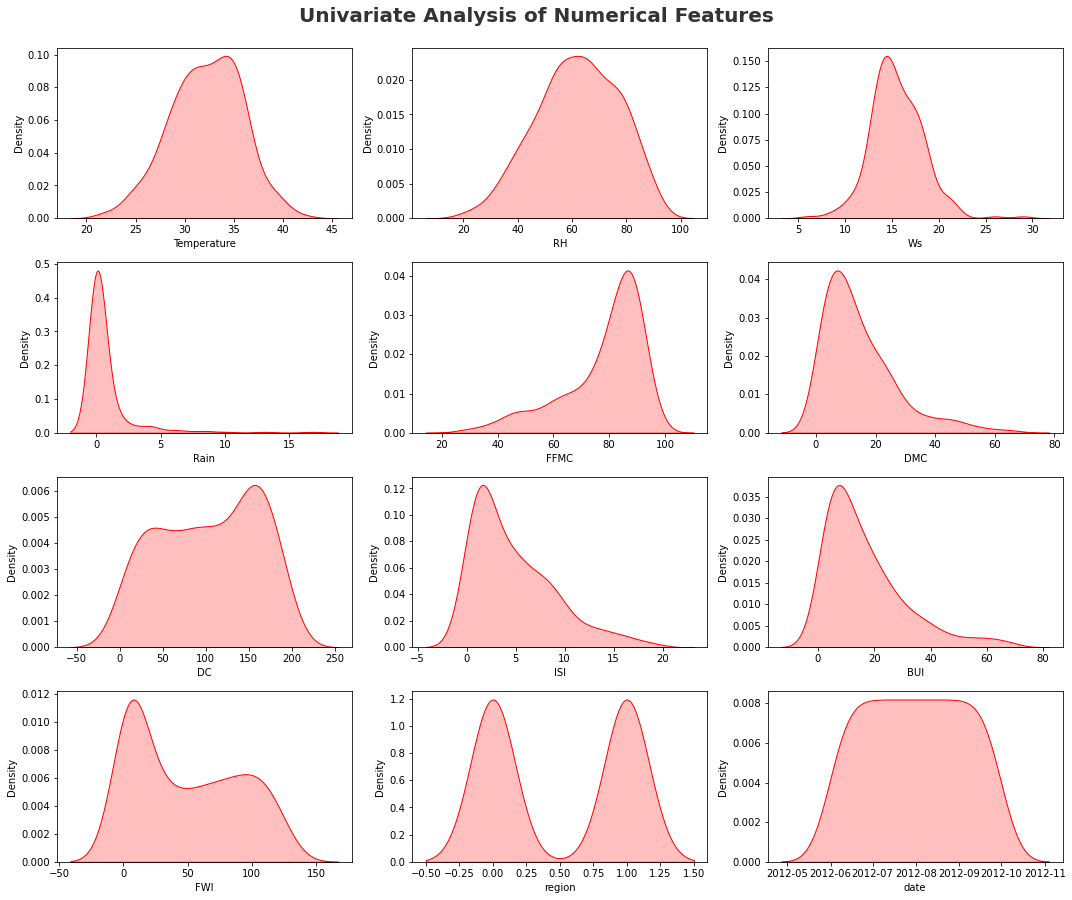

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [8]:
#Visualization of Target Feature

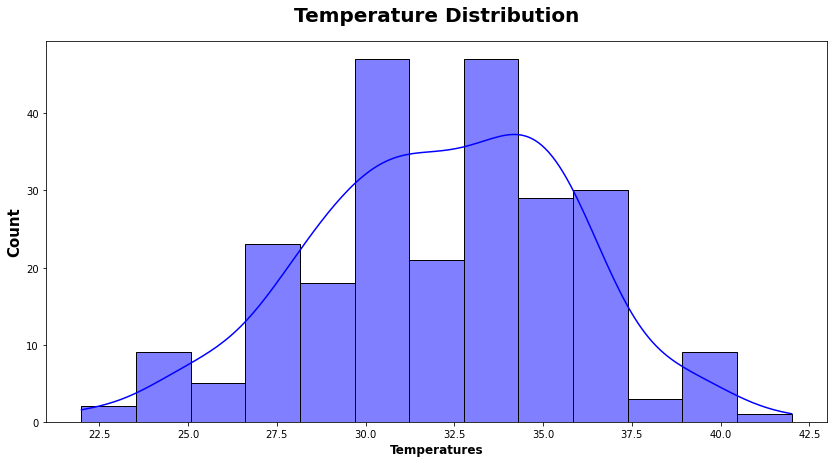

In [27]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec = "black", color='blue', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

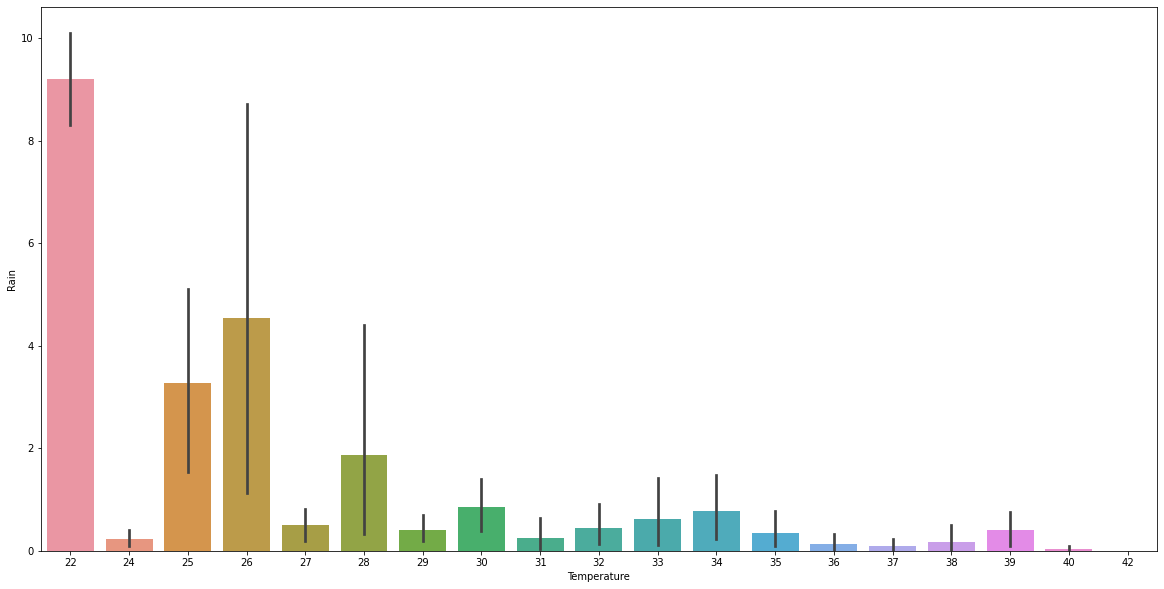

In [28]:
#Temperature Vs Rain
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Rain",data=df)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

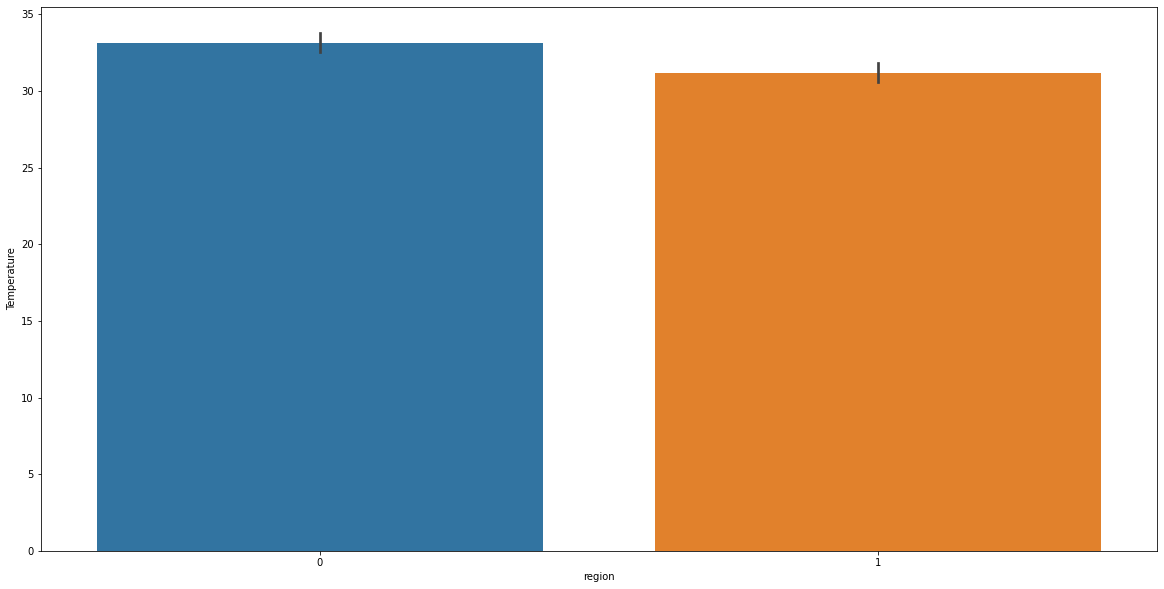

In [29]:
#Temperature Vs Region
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Temperature",data=df)

In [9]:
#Multivariate analysis

In [30]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,-0.165840,0.607551,0.455504,0.380581,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,0.041651,-0.690637,-0.348587,-0.295093,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.040958,0.015248,0.029756,-0.081447,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,0.324748,-0.347105,-0.299171,-0.340412,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,-0.319086,0.739730,0.589652,0.617445,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,-0.200609,0.674499,0.982073,0.384628,-0.191094
DC,-0.165840,0.041651,0.040958,0.324748,-0.319086,-0.200609,1.000000,-0.152717,-0.226445,-0.118684,0.016293
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,-0.152717,1.000000,0.635891,0.412512,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,-0.226445,0.635891,1.000000,0.375234,-0.087370
FWI,0.380581,-0.295093,-0.081447,-0.340412,0.617445,0.384628,-0.118684,0.412512,0.375234,1.000000,-0.108099


<AxesSubplot:>

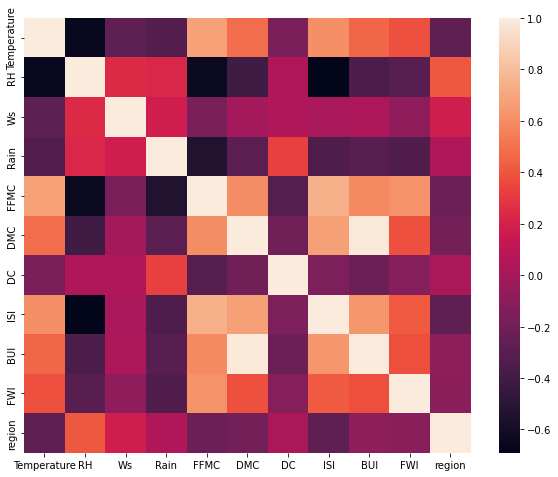

In [31]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Temperature', ylabel='date'>

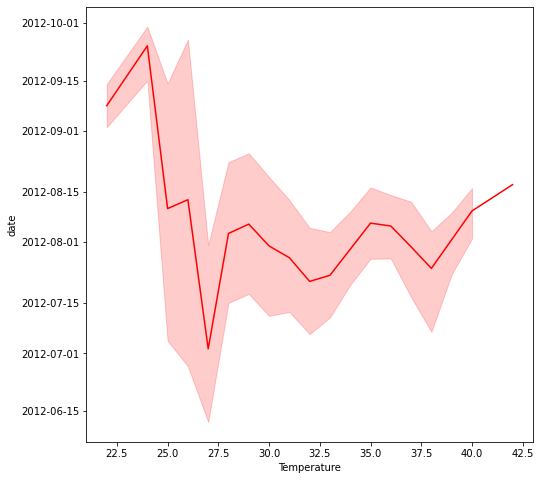

In [32]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Temperature',y='date',data=df,color='r')

<Figure size 720x720 with 0 Axes>

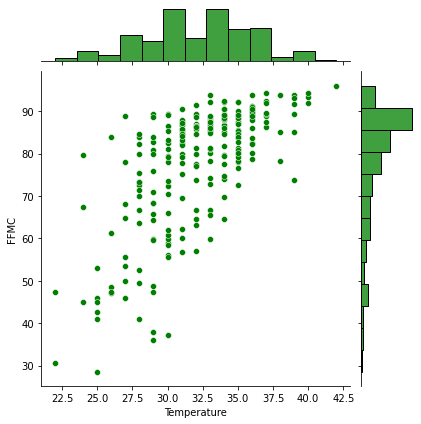

In [33]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Temperature',y='FFMC',data=df,color='g')

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

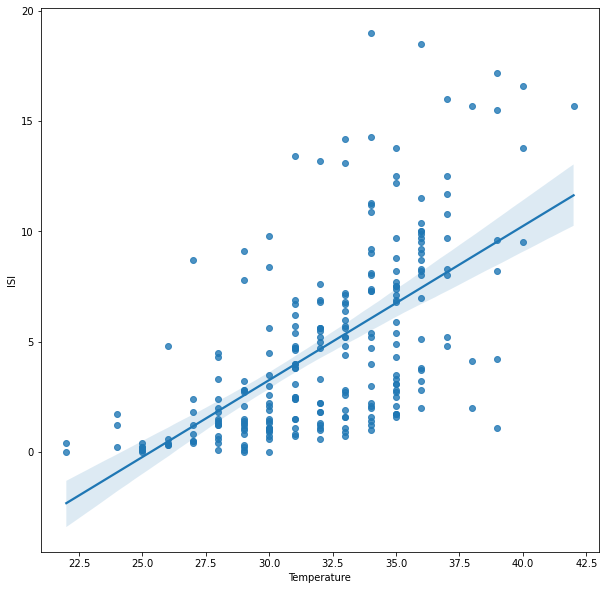

In [34]:
plt.figure(figsize=(10,10))
sns.regplot(x='Temperature',y='ISI',data=df)

In [10]:
#Checking the outliers of the target 'Temperature' feature

<AxesSubplot:xlabel='Temperature'>

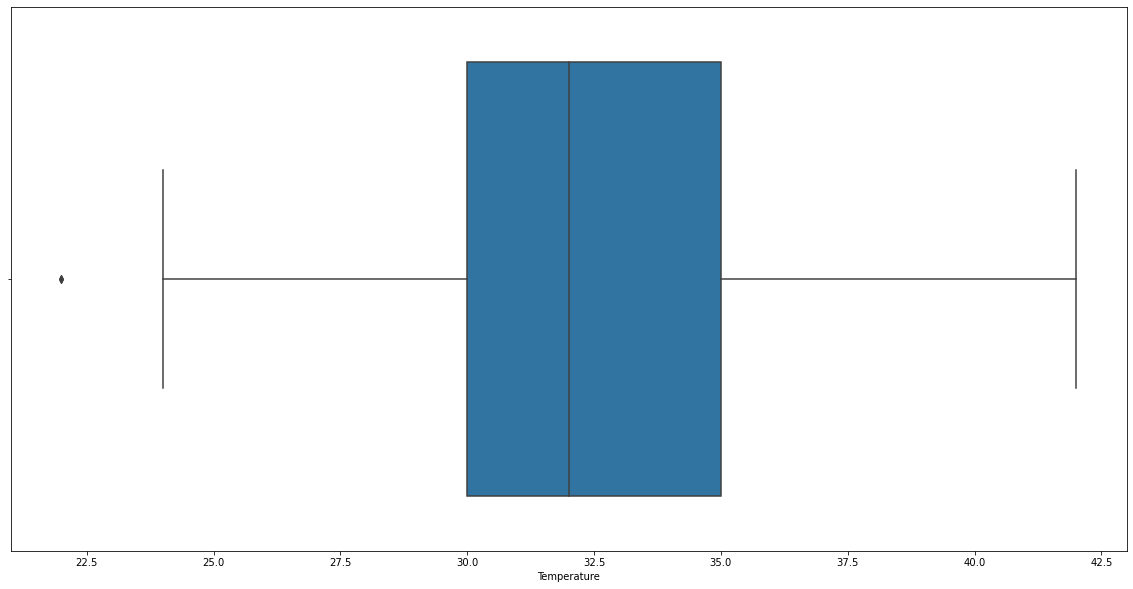

In [35]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

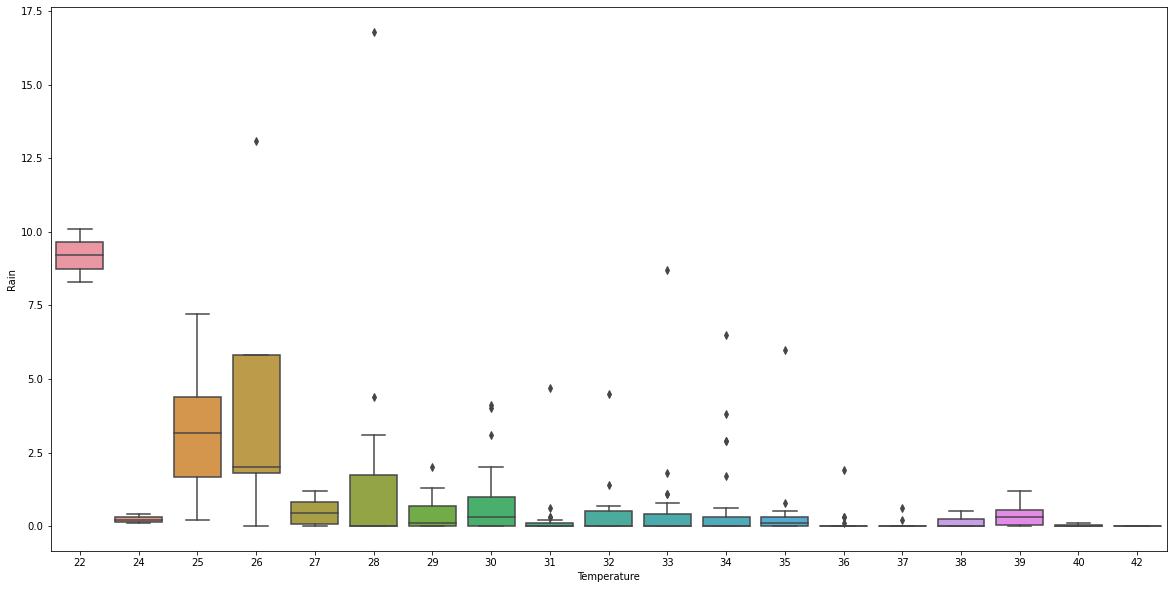

In [36]:
sns.boxplot(x ='Temperature', y ='Rain', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

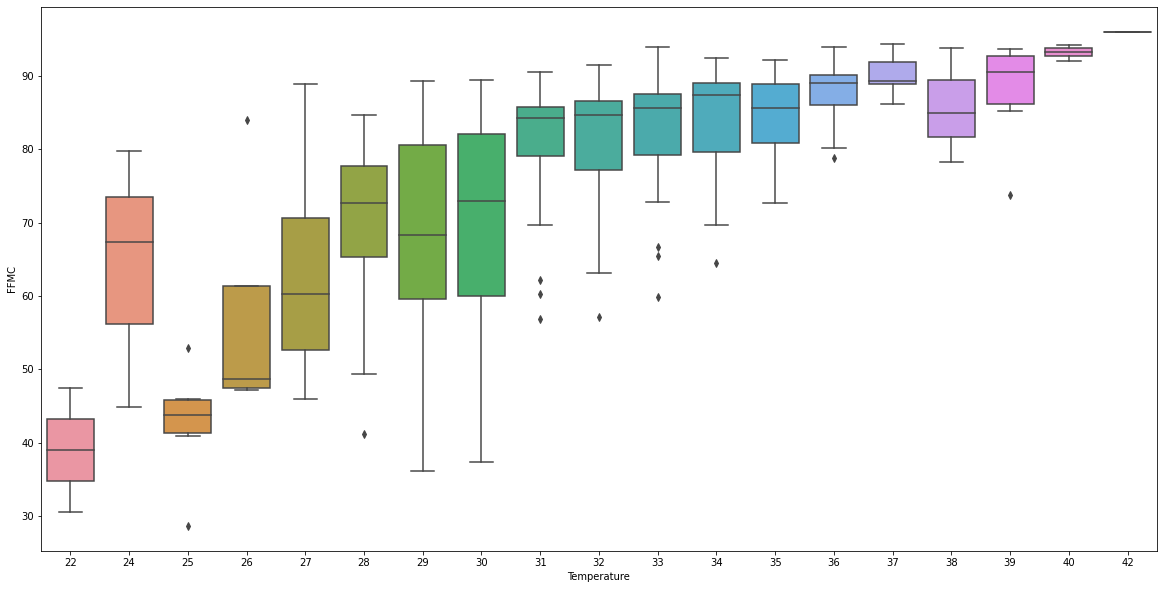

In [37]:
sns.boxplot(x ='Temperature', y ='FFMC', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

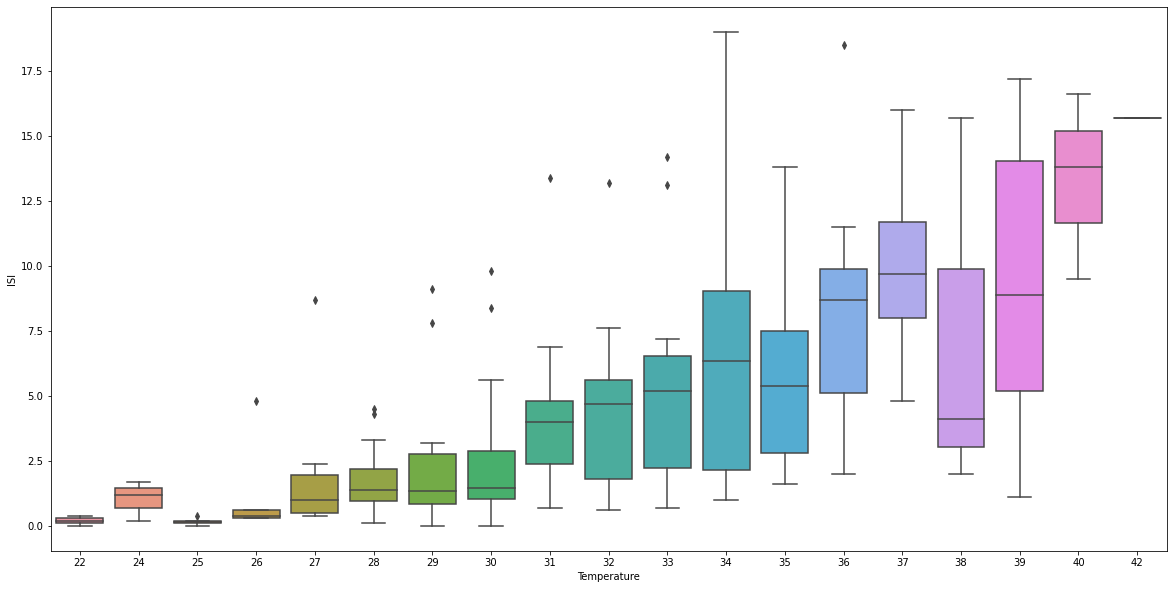

In [38]:
sns.boxplot(x ='Temperature', y ='ISI', data = df)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

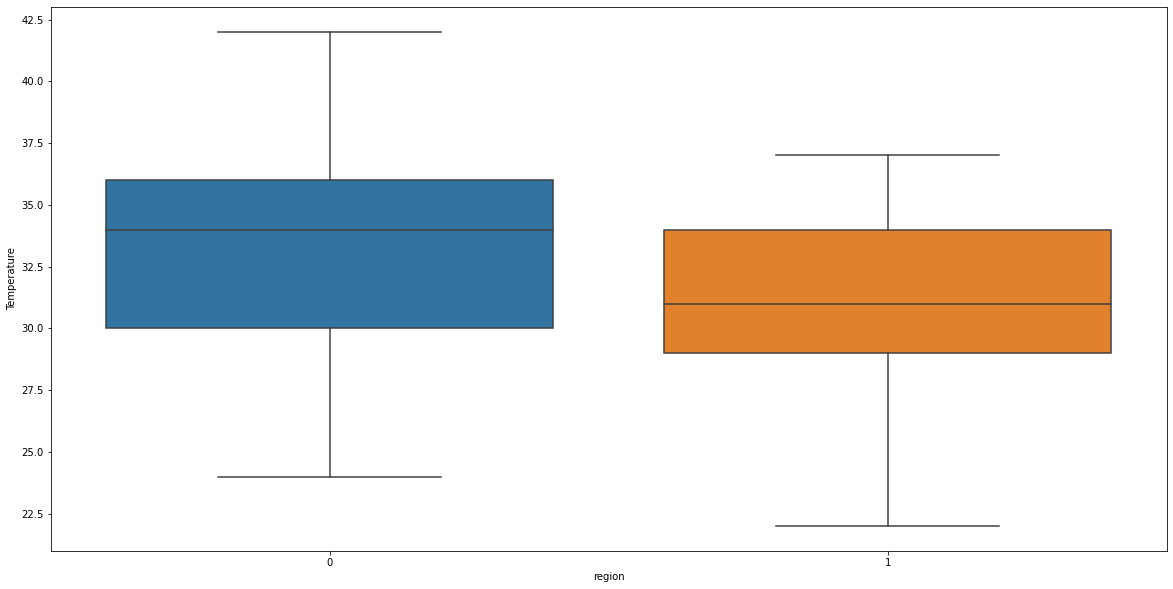

In [39]:
sns.boxplot(x ='region', y ='Temperature', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='BUI'>

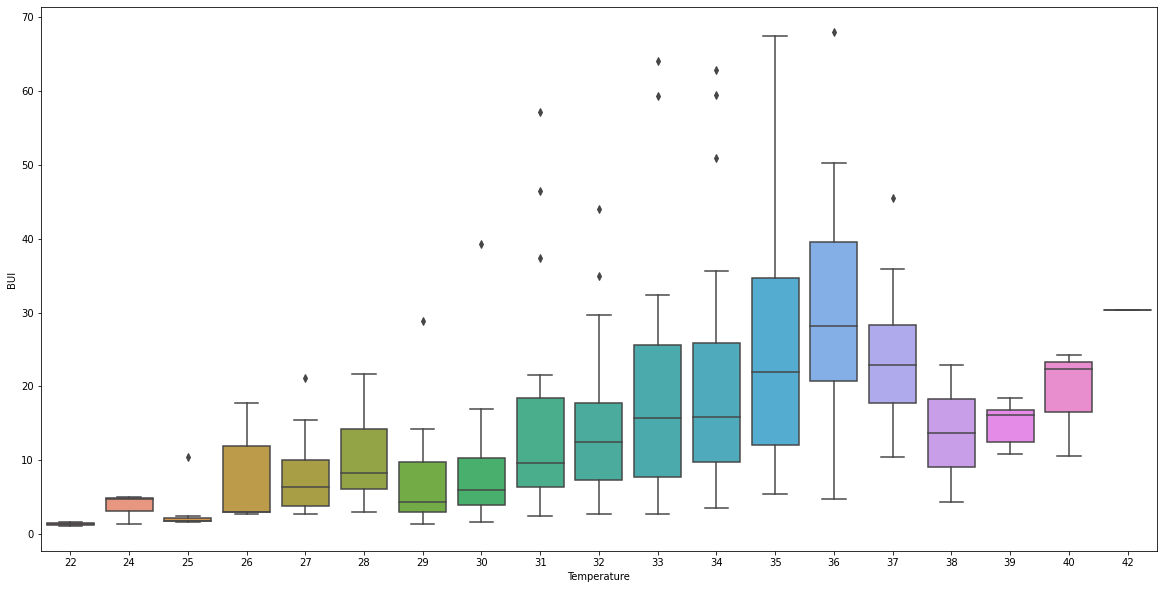

In [40]:
sns.boxplot(x ='Temperature', y ='BUI', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

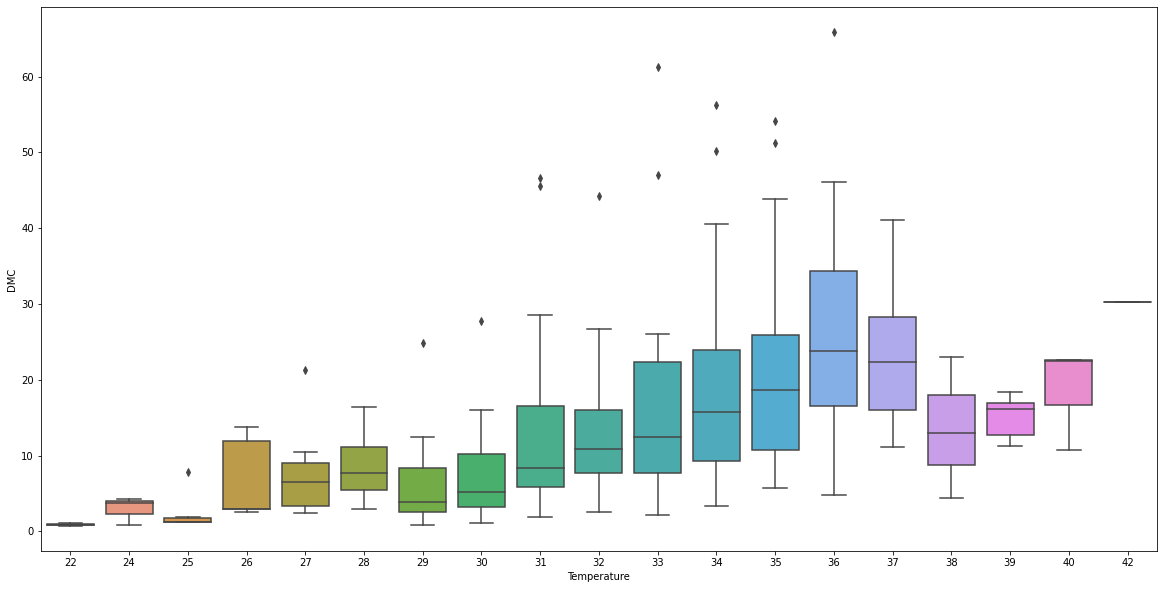

In [41]:
sns.boxplot(x ='Temperature', y ='DMC', data = df)

In [42]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region', 'date'],
      dtype='object')

In [43]:
## Independent Features

x=pd.DataFrame(df, columns=['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])  

## Dependent Features

y=pd.DataFrame(df,columns=['Temperature'])

In [44]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1
1,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1
2,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1
3,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1
4,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,112,4.5,16.9,106,0
240,87,15,4.4,41.1,6.5,164,0.1,6.2,0,0
241,87,29,0.5,45.9,3.5,153,0.4,3.4,2,0
242,54,18,0.1,79.7,4.3,25,1.7,5.1,7,0


In [45]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


In [11]:
#TrainTest Split of instancess

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [47]:
x_train.shape

(183, 10)

In [48]:
x_test.shape

(61, 10)

In [49]:
y_train.shape

(183, 1)

In [50]:
y_test.shape

(61, 1)

In [12]:
#Standardizing or Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [52]:
scaler

StandardScaler()

In [53]:
x_train=scaler.fit_transform(x_train)

In [54]:
x_test=scaler.transform(x_test)

In [55]:
x_train

array([[ 0.60307283, -1.35738182, -0.02994079, ..., -1.01242072,
        -1.11354703, -1.00547949],
       [ 0.39920154,  1.33010831, -0.39873076, ...,  1.35868112,
         0.05745705,  0.99455037],
       [ 0.05941604, -0.5895275 , -0.24067792, ..., -0.81173185,
        -0.96717152,  0.99455037],
       ...,
       [ 1.82630061, -0.97345466, -0.02994079, ..., -1.05701825,
        -1.16233886,  0.99455037],
       [-0.28036945, -1.35738182,  1.76132475, ..., -0.93065859,
        -1.06475519, -1.00547949],
       [ 0.73898703,  0.56225398,  0.07542777, ..., -0.99755488,
        -1.06475519,  0.99455037]])

In [56]:
x_test

array([[ 1.35060092e+00,  2.09796263e+00, -3.98730759e-01,
         4.64306508e-01,  2.77649959e+00, -8.37681459e-01,
        -1.28897912e-01,  3.18717972e+00, -3.57273558e-01,
         9.94550368e-01],
       [-4.16283648e-01, -5.89527499e-01, -3.98730759e-01,
         7.47533477e-01,  1.27461019e+00, -1.64332813e+00,
         6.03071914e-01,  1.45530910e+00, -1.37710293e-01,
        -1.00547949e+00],
       [-5.52197845e-01, -5.89527499e-01, -3.98730759e-01,
         8.85692975e-01,  4.38932401e+00, -1.02623706e+00,
         1.19337016e+00,  3.83384386e+00,  6.91750930e-01,
        -1.00547949e+00],
       [-9.59940436e-01,  1.78326824e-01, -3.98730759e-01,
         6.50821829e-01, -5.60084253e-01, -1.06051990e+00,
         4.37788405e-01, -6.40774666e-01,  1.39923256e+00,
        -1.00547949e+00],
       [-1.23176883e+00,  5.62253985e-01, -2.93362197e-01,
         5.12662332e-01, -3.89415003e-01, -4.43428830e-01,
         1.07221386e-01, -4.25219953e-01,  1.32604481e+00,
        -1.

In [57]:
#Model Training
from sklearn.linear_model import LinearRegression

In [58]:
regression=LinearRegression()

In [59]:
regression
regression.fit(x_train,y_train)

LinearRegression()

In [60]:
print(regression.coef_)

[[-1.51341351 -0.90163204 -0.11506907  0.78372205 -0.62518155  0.01478664
   0.22167161  1.01140564  0.07241618 -0.02383361]]


In [61]:
print(regression.intercept_)

[32.32786885]


In [62]:
reg_pred=regression.predict(x_test)
reg_pred

array([[30.1992093 ],
       [34.91957651],
       [35.89199488],
       [34.08454174],
       [34.07122755],
       [36.99311402],
       [35.49869249],
       [32.024894  ],
       [33.60719759],
       [27.45418724],
       [31.19514097],
       [30.56388727],
       [33.65560752],
       [35.25249859],
       [35.30825148],
       [35.88292279],
       [35.14492728],
       [31.93674281],
       [32.78566039],
       [33.14453545],
       [31.1317734 ],
       [32.89412515],
       [29.65138266],
       [35.95134351],
       [34.7494239 ],
       [35.49284721],
       [34.29139528],
       [35.76348627],
       [34.00282868],
       [35.39381608],
       [29.93762338],
       [22.70037923],
       [30.76975696],
       [27.9379575 ],
       [27.08433316],
       [29.08314577],
       [28.66439885],
       [31.35683895],
       [33.81144169],
       [32.29425618],
       [31.17192851],
       [31.85814979],
       [35.57107631],
       [34.44013006],
       [29.56236382],
       [30

<AxesSubplot:ylabel='Density'>

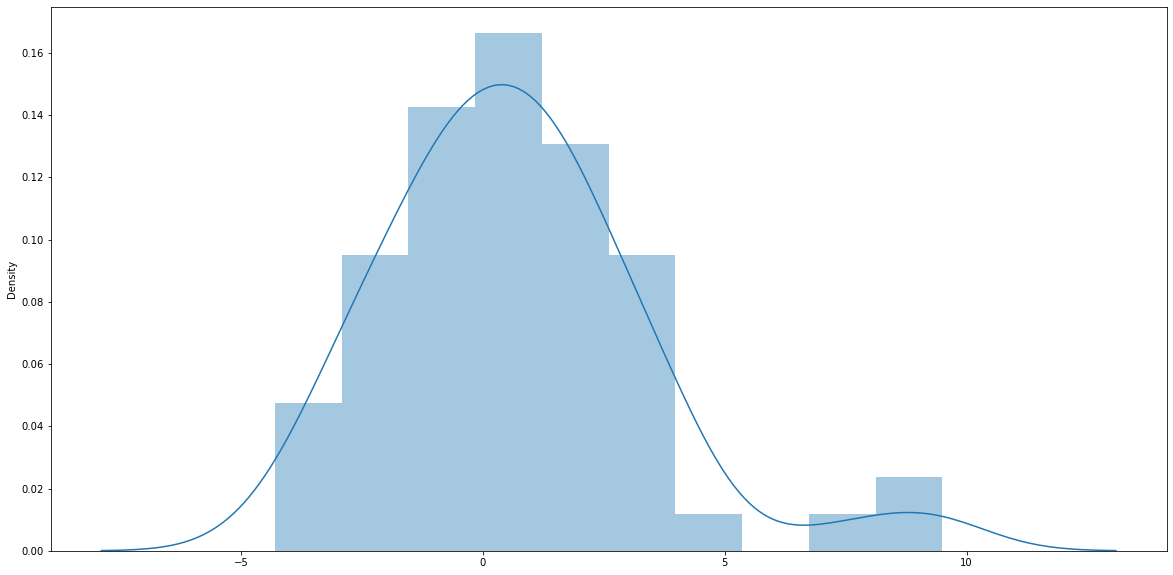

In [63]:
import seaborn as sns
sns.distplot(reg_pred-y_test)

In [13]:
##Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

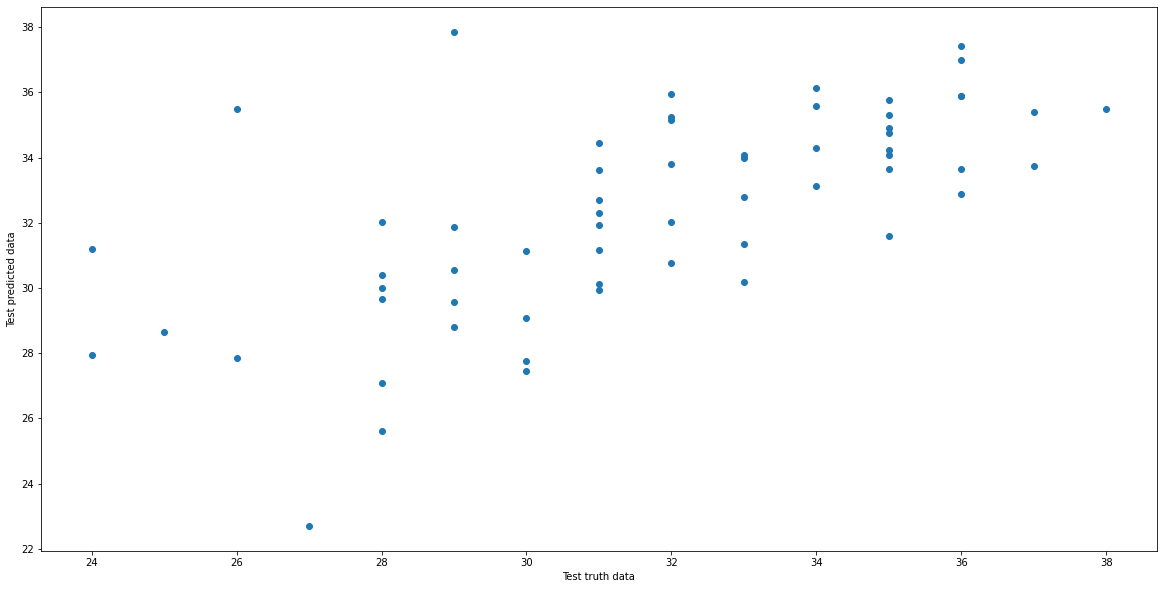

In [64]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

In [65]:
residual=y_test-reg_pred

In [66]:
residual

,Temperature
87,2.800791
236,0.080423
209,0.108005
153,-1.084542
128,0.928772
...,...
90,3.411428
178,0.180528
62,1.352476
232,-8.855439


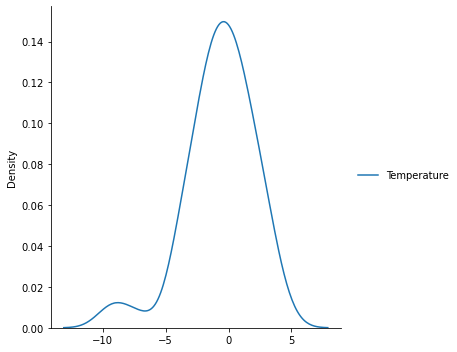

In [67]:
sns.displot(residual,kind='kde')

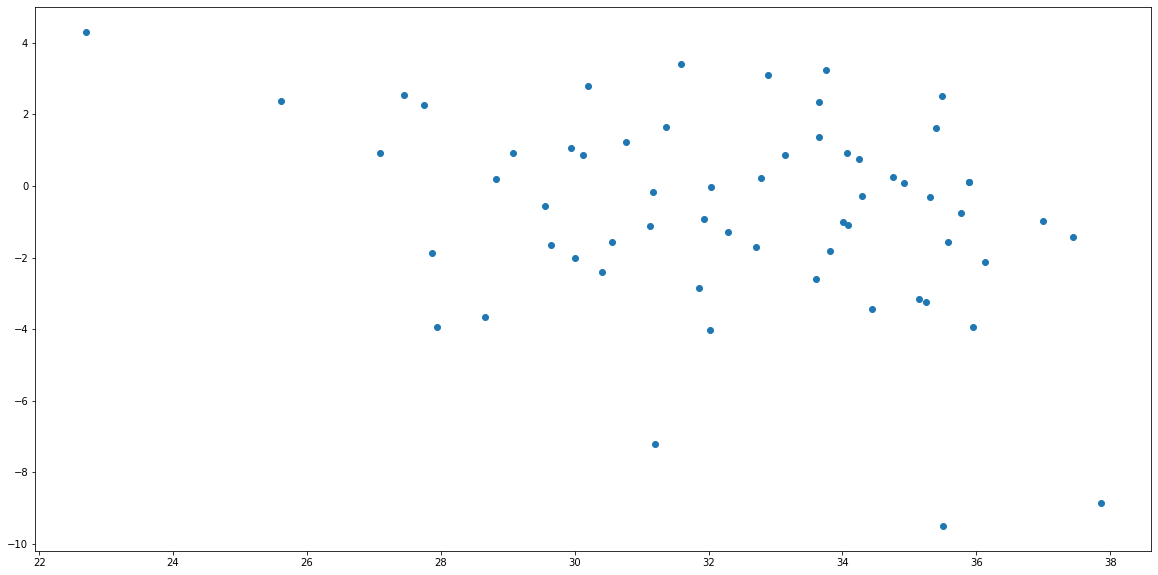

In [68]:
plt.scatter(reg_pred,residual)

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.737085456669362
2.0514546097959534
2.7815616938456285


In [70]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.3340343515089823


In [71]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.20084122181077868

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge=Ridge()

In [74]:
ridge.fit(x_train,y_train)

Ridge()

In [75]:
## Coefficient

print(ridge.coef_)

[[-1.48815371 -0.8929638  -0.11590048  0.79416489 -0.36240006  0.01065248
   0.22571369  0.75088329  0.06930626 -0.00327964]]


In [76]:
## Intercept

print(ridge.intercept_)

[32.32786885]


In [77]:
ridge_pred=ridge.predict(x_test)

In [78]:
ridge_pred

array([[30.18046732],
       [34.85688552],
       [36.0233965 ],
       [34.06985975],
       [34.036509  ],
       [37.05726664],
       [35.44223812],
       [32.00649122],
       [33.64218714],
       [27.51081396],
       [31.15889792],
       [30.58479957],
       [33.70273347],
       [35.21482462],
       [35.25371842],
       [35.86715065],
       [35.06728926],
       [31.90650546],
       [32.79971337],
       [33.18428117],
       [31.14706018],
       [32.9255105 ],
       [29.7027331 ],
       [35.93510432],
       [34.6778636 ],
       [35.45225143],
       [34.26694764],
       [35.68788411],
       [33.97102681],
       [35.40395151],
       [29.94039213],
       [22.74605408],
       [30.74717935],
       [27.94970031],
       [27.09038402],
       [29.09670249],
       [28.66842381],
       [31.37433807],
       [33.81676863],
       [32.30988075],
       [31.16588335],
       [31.86445564],
       [35.4012089 ],
       [34.44806203],
       [29.58504489],
       [30

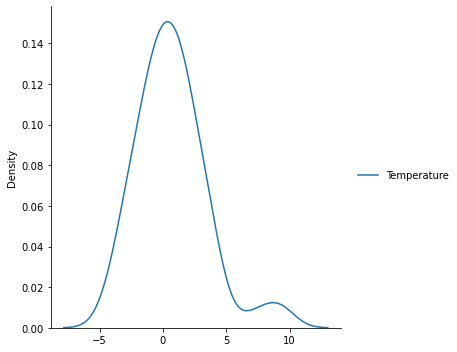

In [79]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

Text(0, 0.5, 'Test predicted data')

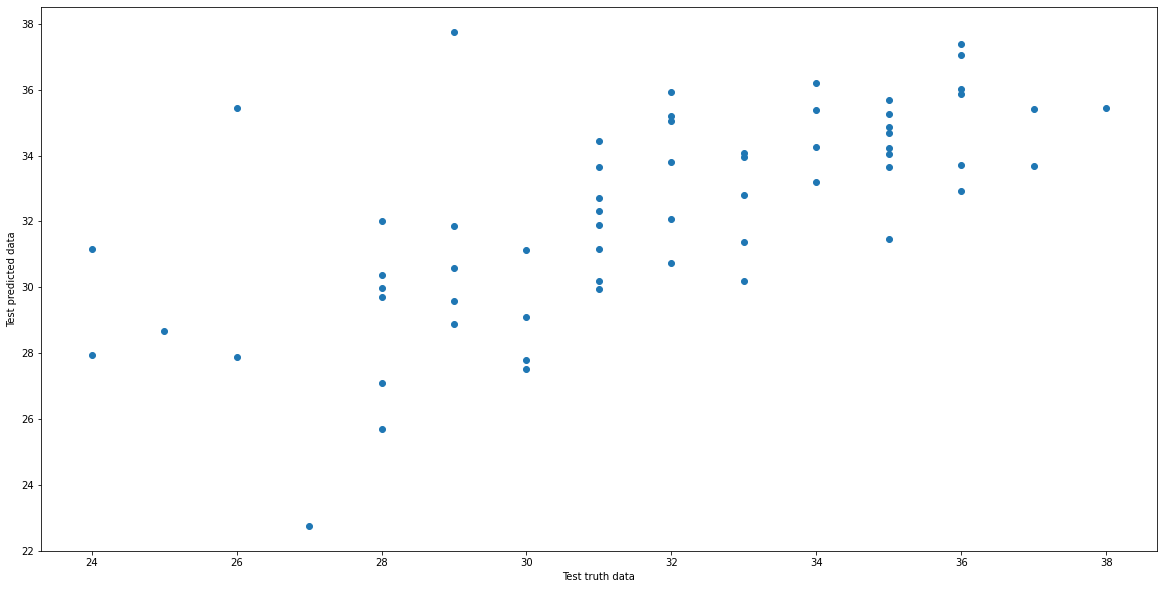

In [80]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

In [81]:
# Residual

residual=y_test-ridge_pred

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.665327437958337
2.041550321148253
2.7686327741248635


In [83]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(ridge_score)

0.34021088603648


In [84]:
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.2082530632437759

In [85]:
lasso=Lasso()

In [86]:
lasso.fit(x_train,y_train)

Lasso()

In [87]:
print(lasso.coef_)

[-0.99867244 -0.         -0.          0.76309619  0.         -0.
  0.          0.          0.         -0.        ]


In [88]:
print(lasso.intercept_)

[32.32786885]


In [89]:
## Prediction for test data

lasso_pred = lasso.predict(x_test)

In [90]:
lasso_pred

array([31.33337146, 33.31403981, 33.55520256, 33.78317457, 33.94921311,
       35.40474663, 32.32891652, 32.72559914, 34.34851934, 30.23953362,
       31.62720026, 31.59231021, 33.30876836, 33.63755987, 33.72386471,
       34.18642833, 33.44513986, 31.56332935, 32.47195606, 33.06299612,
       31.39925247, 32.84358113, 31.13965176, 33.81019378, 33.24747262,
       33.9854513 , 33.77393137, 33.91496081, 33.42866355, 33.5439977 ,
       31.27337542, 28.93817182, 31.28127048, 29.22479174, 28.68514226,
       30.15452847, 29.50153072, 31.98499685, 33.31862507, 32.23013135,
       32.04563063, 31.67792887, 33.79965088, 33.08077212, 31.07438426,
       31.84462937, 33.60132168, 31.24441878, 31.88751137, 29.76115565,
       30.19341449, 34.56332485, 30.81939304, 34.95932128, 32.61426097,
       29.49231174, 31.50465723, 30.73573604, 32.80204727, 34.06319912,
       32.30986505])

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

6.656397807859862
2.0204341814642763
2.579999575166605


In [92]:
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_pred)
print(lasso_score)

0.42705398466235156


In [93]:
1-(1-lasso_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.31246478159482194

In [94]:
elastic=ElasticNet()

In [95]:
elastic.fit(x_train,y_train)

ElasticNet()

In [96]:
print(elastic.coef_)

[-0.78126403 -0.35786134 -0.0017584   0.64405647  0.12863016 -0.
  0.36540707  0.05905364  0.         -0.        ]


In [97]:

print(elastic.intercept_)

[32.32786885]


In [98]:
## Prediction for test data
elastic_pred = elastic.predict(x_test)

In [99]:

elastic_pred

array([31.31990987, 33.81648164, 34.76845544, 33.48397382, 33.38367406,
       35.99481442, 33.1598045 , 32.00366888, 33.97631556, 29.51714793,
       31.32719128, 31.34157269, 33.48262309, 33.92724755, 33.70066916,
       34.42138956, 33.39498221, 32.05247755, 32.55731413, 33.15265518,
       31.49504029, 32.89898163, 31.02781287, 34.23414759, 33.22644246,
       33.89439674, 33.25122378, 34.58203638, 33.02914238, 34.2112701 ,
       30.80361085, 27.15171482, 31.16789312, 29.24170212, 28.87737775,
       30.06648961, 29.6103533 , 31.64575936, 32.91727245, 32.18174946,
       31.57838692, 31.61329686, 34.05959284, 33.20435046, 30.61166749,
       31.05837641, 33.47785546, 31.3455059 , 32.21789936, 28.99688777,
       29.64588157, 35.23943631, 30.69109892, 35.30176006, 32.95935882,
       29.35802973, 31.39468221, 30.5156976 , 32.7612381 , 34.71552436,
       32.48340842])

Text(0, 0.5, 'Test predicted data')

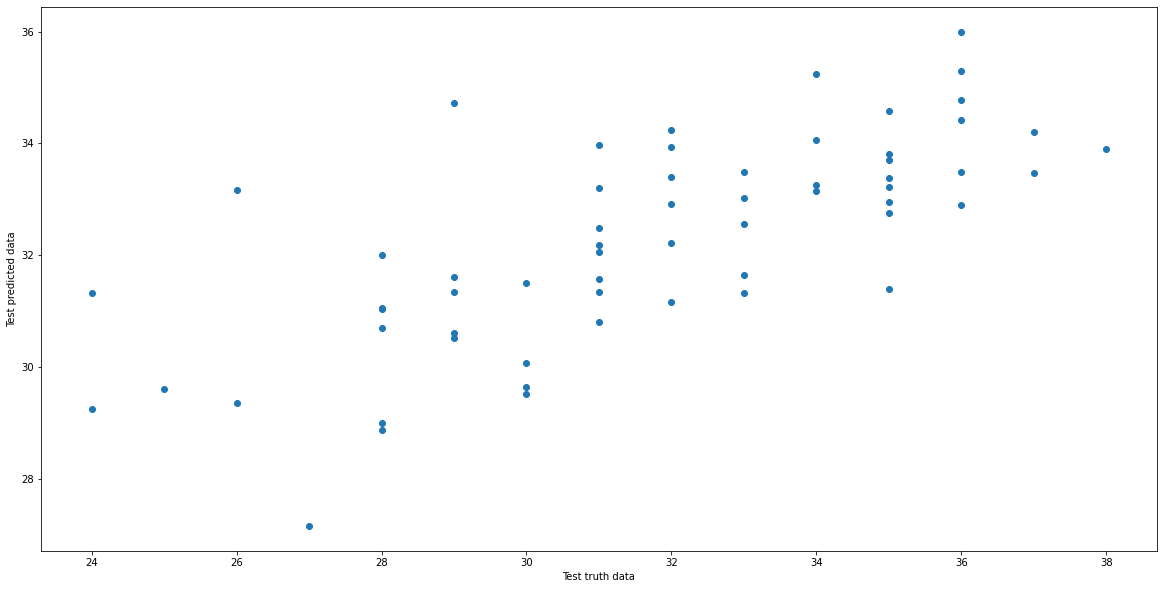

In [100]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

6.372915866086282
1.9156011627719483
2.524463480838311


In [102]:
from sklearn.metrics import r2_score
elastic_score=r2_score(y_test,elastic_pred)
print(elastic_score)

0.4514545468955111


In [103]:
1-(1-elastic_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3417454562746133